In [1]:
import pandas as pd 
df = pd.read_csv("MBA Salary.csv") 
df.head(3) 

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000


In [2]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [3]:
df.shape 

(50, 3)

In [4]:
import statsmodels.api as sm 
X = sm.add_constant(df['Percentage in Grade 10']) 
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [5]:
Y =df['Salary'] 
Y.head() 

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(X,Y,train_size = 0.8, random_state = 100)

In [7]:
mba_salary_lm = sm.OLS(train_y, train_X).fit()

In [8]:
print(mba_salary_lm.params) 

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [9]:
print(mba_salary_lm.summary2()) 

                          Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-10-05 14:37      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grad

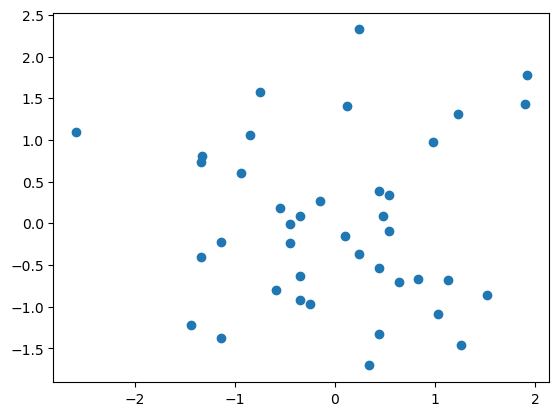

In [15]:
import matplotlib.pyplot as plt 
def get_std_values(vals): 
    return(vals - vals.mean())/vals.std() 
x_axis = get_std_values(mba_salary_lm.fittedvalues) 
y_axis = get_std_values(mba_salary_lm.resid) 
plt.scatter(x_axis, y_axis) 
plt.show()

In [17]:
from scipy.stats import zscore 
df['z_score_salary'] = zscore(df.Salary) 
df[(df.z_score_salary > 2.0)| (df.z_score_salary< -3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary
8,9,82.8,425000,2.196439
12,13,66.0,428000,2.235941
13,14,83.0,450000,2.525625


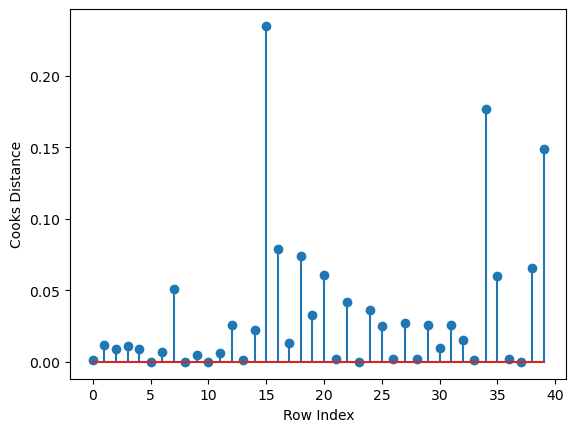

In [18]:
import numpy as np 
mba_influence = mba_salary_lm.get_influence() 
(c,p) = mba_influence.cooks_distance
plt.stem(np.arange(len(train_X)),np.round(c,3)) 
plt.xlabel("Row Index") 
plt.ylabel("Cooks Distance") 
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
pred_y=mba_salary_lm.predict(test_X)
print('R2 Score =',np.abs(r2_score(test_y,pred_y)))
print('RMSE =',np.sqrt(mean_squared_error(test_y,pred_y)))

R2 Score = 0.156645849742304
RMSE = 73458.04348346895


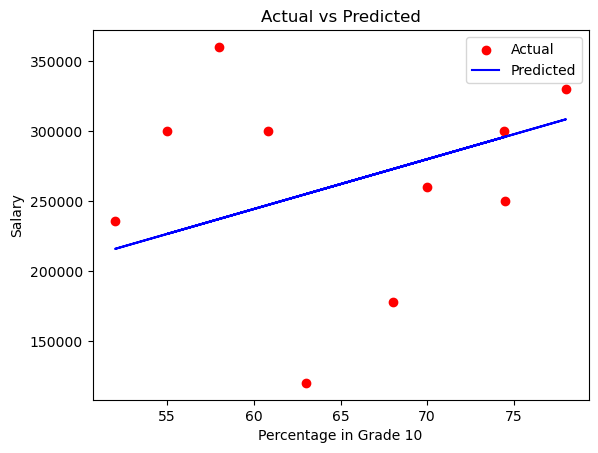

In [20]:
import matplotlib.pyplot as plt
plt.scatter(test_X['Percentage in Grade 10'],test_y,color='red',label="Actual")
plt.plot(test_X['Percentage in Grade 10'],pred_y,color='blue',label="Predicted")
plt.xlabel('Percentage in Grade 10')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("\nModel Evaluation:")
print(f"MAE  (Mean Absolute Error): {mae}")
print(f"MSE  (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R²   (R-squared): {r2}")